<a href="https://colab.research.google.com/github/zahraDehghanian97/SCINet/blob/master/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/MCIRD_aaic2021_train.csv', header=0)

In [3]:
df.head()

,day,subscriber_ecid,subscriber_gender,subscriber_age,registration_province,months_of_subscription,most_used_province,is_usage_nonzero,subscriber_total_expenses,nonpackage_voice_expenses,package_voice_noncash_expenses,is_voice_expenses_nonzero,is_voice_usage_nonzero,call_in_network_duration,call_off_netwrok_duration,nonpackage_call_in_network_expenses,nonpackage_call_off_network_expenses,total_call_duration,#inter_operator_calls,xyz_score,hxr_score,data_cash_expenses,nonpackage_data_expenses,package_data_noncash_expenses,subscriber_data_expenses,subscriber_nondata_expenses,data_usage_volume,is_data_expenses_nonzero,is_data_usage_nonzero,#activated_monthly_data_packages,#activated_short_term_data_packages,#activated_type_one_data_packages,#activated_type_two_data_packages,#activated_type_three_data_packages
0,(n)01,-06FoayTOXJ8-,1,36.0,8,188,8,1,-0.132373,-0.072802,0.0,1,1,-0.155626,0.0,-0.256454,0.0,-0.220797,0.0,0.031219,38.192862,0.0,0.0,0.0,0.0,-0.104687,0.072258,0,1,0,0,0,0,0
1,(n)02,-06FoayTOXJ8-,1,36.0,8,188,8,1,-0.122445,-0.060440,0.0,1,1,-0.142857,0.0,0.036145,0.0,-0.210668,0.0,0.033491,38.144232,0.0,0.0,0.0,0.0,-0.092861,0.049563,0,1,0,0,0,0,0
2,(n)03,-06FoayTOXJ8-,1,36.0,8,188,8,1,0.343066,0.519231,0.0,1,1,0.418196,0.0,0.762478,0.0,0.264686,0.0,0.036831,37.990377,0.0,0.0,0.0,0.0,0.461665,-0.013977,0,0,0,0,0,0,0
3,(n)04,-06FoayTOXJ8-,1,36.0,8,188,8,1,1.869763,2.420329,0.0,1,1,2.259377,0.0,3.144579,0.0,1.821742,0.0,0.039942,37.777398,0.0,0.0,0.0,0.0,2.280301,0.000403,0,1,0,0,0,0,0
4,(n)05,-06FoayTOXJ8-,1,36.0,8,188,8,1,-0.233858,-0.199176,0.0,1,1,-0.277733,0.0,-0.137693,0.0,-0.324105,0.0,0.042694,37.545275,0.0,0.0,0.0,0.0,-0.225579,0.016209,0,1,0,0,0,0,0


In [4]:
df1 = df[['subscriber_ecid', 'data_usage_volume']]

In [5]:
df1.head()

,subscriber_ecid,data_usage_volume
0,-06FoayTOXJ8-,0.072258
1,-06FoayTOXJ8-,0.049563
2,-06FoayTOXJ8-,-0.013977
3,-06FoayTOXJ8-,0.000403
4,-06FoayTOXJ8-,0.016209


خیلی از مقادیر دیتاست -0.0139766307813943 این هستن و میشه به راحتی اینارو جایگزین کرد

In [6]:
unique_sub_id = set(df1['subscriber_ecid'].values)

In [7]:
len(unique_sub_id)

100

In [8]:
# df_array = df1.values

In [9]:
import numpy as np
data_list = []
for sub_id in unique_sub_id:
    # print(sub_id)
    temp = df1[df1['subscriber_ecid']==sub_id].values
    if temp.shape[0] < 69:
        print(temp.shape)
        print(sub_id)
    else:
        data_list.append(temp)

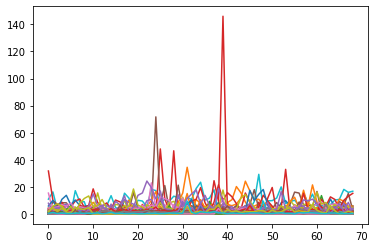

In [12]:
import matplotlib.pyplot as plt
for j in range(len(data_list)) :
  one_sample = data_list[j]
  y = one_sample[:,1]
  x = []

  for i in range(len(one_sample[:,1])):
    x.append(i)
  plt.plot(x,y)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


ZeroDivisionError: ignored

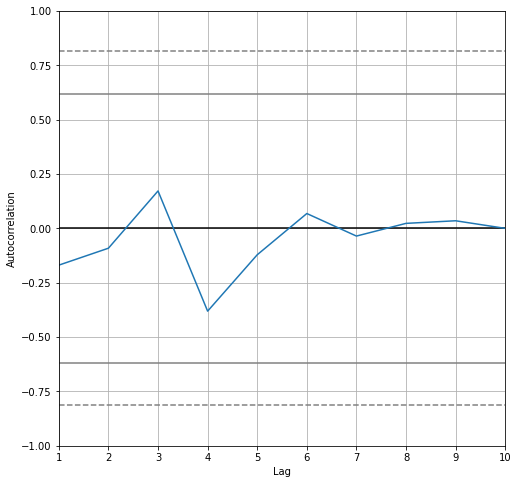

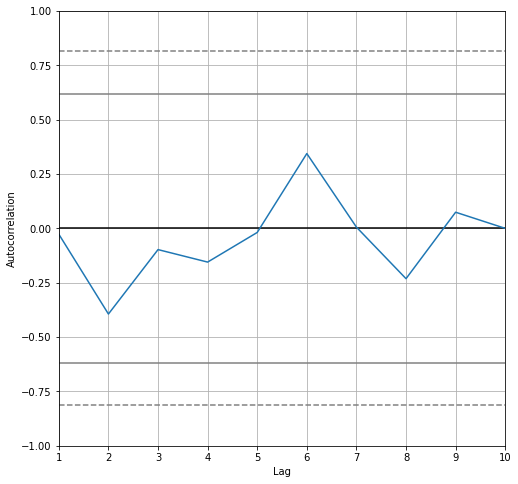

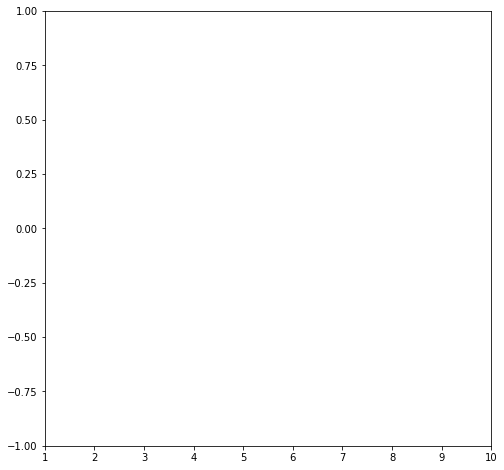

In [13]:
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt 
from pandas.plotting import autocorrelation_plot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
for j in range(len(data_list)) :
  one_sample = data_list[j]
  plt.figure(figsize=(8,8))
  autocorrelation_plot(one_sample[0:10,1])
plt.show()


In [14]:
# !pip install statsmodels==0.11.0rc1
!pip install statsmodels

In [20]:
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame
from math import sqrt


final_test = []
final_predict = []
# split into train and test sets
for j in range(len(data_list)):
  X = data_list[j]
  size = int(len(X) * 0.66)
  train, test = X[0:size], X[size:len(X)]
  train =(train[:,1])
  test = list(test[:,1]+0.00001*np.random.rand(len(test)))
  history =list(train+0.00001*np.random.rand(len(train)))
  predictions = list()
  # walk-forward validation
  for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(trend='nc', disp=1)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
  final_test.extend(test)
  final_predict.extend(predictions)
# evaluate forecasts
rmse = sqrt(mean_squared_error(final_test, final_predict))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=0.016231, expected=-0.013975
predicted=-0.015290, expected=0.003473
predicted=-0.020559, expected=-0.013513
predicted=0.007735, expected=-0.005661
predicted=-0.008996, expected=0.069083
predicted=0.011611, expected=-0.013974
predicted=0.068113, expected=0.017237
predicted=-0.010915, expected=-0.013976
predicted=-0.018032, expected=-0.013969
predicted=-0.002258, expected=-0.013970
predicted=-0.016135, expected=-0.013971
predicted=-0.018424, expected=0.069025
predicted=0.015917, expected=-0.013974
predicted=0.065456, expected=-0.013972
predicted=-0.020484, expected=-0.013975
predicted=-0.039830, expected=-0.013972
predicted=-0.002869, expected=0.047568
predicted=0.010451, expected=-0.013973
predicted=0.035826, expected=0.013566
predicted=-0.008421, expected=0.030357
predicted=0.008429, expected=0.058024
predicted=0.054878, expected=0.023297
predicted=0.053458, expected=0.016064
predicted=0.012869, expected=-0.013975
predicted=5.340358, expected=3.975563
predicted=4.647030, expe

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=2.306735, expected=2.336043
predicted=2.836474, expected=0.627169


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=1.603228, expected=3.611594
predicted=3.812314, expected=4.874542


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=4.291483, expected=3.312670
predicted=3.272674, expected=2.855321


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=3.123012, expected=0.214396
predicted=1.303041, expected=5.045749


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=4.785462, expected=5.623424
predicted=-0.013970, expected=-0.013976
predicted=-0.013974, expected=-0.013970
predicted=-0.013971, expected=0.773380
predicted=0.282212, expected=-0.013975
predicted=0.018907, expected=-0.013969
predicted=0.240679, expected=1.070029
predicted=0.343041, expected=-0.013974
predicted=0.027913, expected=-0.013969
predicted=0.835708, expected=-0.013975
predicted=0.070415, expected=-0.013971
predicted=0.224083, expected=-0.013968
predicted=0.028978, expected=-0.013968
predicted=0.031971, expected=-0.013972
predicted=-0.001702, expected=-0.013974
predicted=-0.005092, expected=-0.013967
predicted=-0.010369, expected=-0.013972
predicted=-0.011668, expected=-0.013968
predicted=-0.012914, expected=-0.013971
predicted=-0.013342, expected=-0.013974
predicted=-0.013664, expected=-0.013967
predicted=-0.013795, expected=-0.013971
predicted=-0.013883, expected=-0.013973
predicted=-0.013920, expected=0.208064
predicted=0.025080, expected=4.559676
predicted=0.00517

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.032256, expected=0.060665
predicted=0.042621, expected=-0.000845
predicted=0.014842, expected=0.020116
predicted=0.035328, expected=-0.000100


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.019338, expected=0.074318
predicted=0.055129, expected=-0.002681
predicted=0.012825, expected=0.054605
predicted=0.034555, expected=0.029067


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.037945, expected=-0.003379
predicted=0.018412, expected=-0.002832
predicted=0.025616, expected=0.096469
predicted=0.044998, expected=0.038495


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.042452, expected=-0.002132
predicted=0.017134, expected=-0.003767


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.027510, expected=-0.003262
predicted=0.016306, expected=0.004719
predicted=0.027880, expected=-0.003838
predicted=0.016293, expected=0.037904
predicted=0.035654, expected=-0.006864
predicted=0.017429, expected=0.011115


ValueError: ignored

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

In [ ]:
# training_set_scaled = train_data.iloc[:, :].values

In [ ]:
X = []
y = []
mem_step = 14

for item in data_list:
  for i in range(mem_step, 69):
      X.append(item[i-mem_step:i, 1:2])
      # print(item[i-mem_step:i, 1:2])
      y.append(item[i, 1:2])

X, y = np.array(X), np.array(y)
X, y = X.astype('float32'), y.astype('float32')

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# check GPU availability
print("GPU is available :)" if tf.config.list_physical_devices("GPU") else "Not available :(")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
keras_reg = Sequential()

keras_reg.add(LSTM(units = 64, return_sequences = True, input_shape = (X.shape[1], 1)))
keras_reg.add(Dropout(0.4))

keras_reg.add(LSTM(units = 100, return_sequences = True))
keras_reg.add(Dropout(0.4))

keras_reg.add(LSTM(units = 100, return_sequences = True))
keras_reg.add(Dropout(0.2))

keras_reg.add(LSTM(units = 100, return_sequences = True))
keras_reg.add(Dropout(0.2))

keras_reg.add(LSTM(units = 16))
keras_reg.add(Dropout(0.2))

# keras_reg.add(Dense(units=32, activation='relu' ))
keras_reg.add(Dense(units=16, activation='relu' ))
keras_reg.add(Dense(units = 1))

In [ ]:
keras_reg.compile(optimizer = 'adam',
                  loss = 'mean_squared_error',
                  metrics='mse')
# keras_reg.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [ ]:
history = keras_reg.fit(X_train, y_train,
                        validation_split=0.2,
                        shuffle=False,
                        epochs = 30,
                        verbose = 1)

In [ ]:
def plot_loss(history):
  fig = plt.figure(figsize=(7,7))
  plt.plot(history.history['mse'], label='mse')
  plt.plot(history.history['val_mse'], label='val_mse')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
predicted_stock_price = keras_reg.predict(X_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predicted_stock_price)/len(y_test)